# LUIS DAVID MAZA RAMÍREZ - A01747890

## INTRODUCCIÓN

A lo largo de la historia de la humanidad, se ha presentado la problemática de poder identificar el peligro que representan algunos animales para el ser humano, es por eso que el objetivo de la implementación de este modelo, es generar una arquitectura de deep learning para identificar la cara de un animal y categorizar si este mismo es un perro, un gato o un animal salvaje.

## DATOS

Link del dataset utilizado: https://www.kaggle.com/datasets/andrewmvd/animal-faces

El dataset utilizado contiene tres tipos de clases diferentes, contando cada una con alrededor de 5000 imagenes para su etapa de entrenamiento. Las clases utilizadas son:

- "Cat" (Gato)
- "Dog" (Perro)
- "Wild" (Vida animal salvaje)

El dataset viene dividido en clases de entrenamiento y validación, conteniendo la primera de ellas un aproximado de 14500 imágenes y la segunda 1500 imagenes, dando como resultado un total de 16000 archivos para su utilización.

In [43]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle datasets download -d andrewmvd/animal-faces


Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
animal-faces.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
import zipfile
with zipfile.ZipFile("animal-faces.zip", "r") as zip_ref:
    zip_ref.extractall("animal-faces")


In [26]:
os.listdir('animal-faces/afhq')

['train', 'val']

Un proceso importante realizado para la implementación de este modelo, es que el dataset contaba con imágenes de 512 x 512 pixeles, por lo que se hizo una redimensión de tamaño a 180 x 180 pixeles.

In [ ]:
from PIL import Image
import os

def resize_images(input_folder, output_folder, new_size=(180, 180)):
    for root, _, files in os.walk(input_folder):
        relative_path = os.path.relpath(root, input_folder)
        target_folder = os.path.join(output_folder, relative_path)
        os.makedirs(target_folder, exist_ok=True)

        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                img_path = os.path.join(root, filename)
                img = Image.open(img_path)

                img_resized = img.resize(new_size)

                img_resized.save(os.path.join(target_folder, filename))
                print(f"Redimensionada: {os.path.join(relative_path, filename)}")

input_folder = '/Users/davidmaza/Desktop/Blumenkron/animal-faces/afhq/train'
output_folder = '/Users/davidmaza/Desktop/Blumenkron/animal-faces/afhq/trainrz'

resize_images(input_folder, output_folder)


Redimensionada: cat/pixabay_cat_000455.jpg
Redimensionada: cat/pixabay_cat_001993.jpg
Redimensionada: cat/pixabay_cat_004633.jpg
Redimensionada: cat/pixabay_cat_002242.jpg
Redimensionada: cat/pixabay_cat_002524.jpg
Redimensionada: cat/pixabay_cat_004155.jpg
Redimensionada: cat/flickr_cat_000619.jpg
Redimensionada: cat/pixabay_cat_000333.jpg
Redimensionada: cat/pixabay_cat_000327.jpg
Redimensionada: cat/pixabay_cat_001039.jpg
Redimensionada: cat/pixabay_cat_002530.jpg
Redimensionada: cat/pixabay_cat_004141.jpg
Redimensionada: cat/pixabay_cat_004627.jpg
Redimensionada: cat/pixabay_cat_003148.jpg
Redimensionada: cat/pixabay_cat_001987.jpg
Redimensionada: cat/pixabay_cat_003160.jpg
Redimensionada: cat/pixabay_cat_001777.jpg
Redimensionada: cat/pixabay_cat_000469.jpg
Redimensionada: cat/flickr_cat_000143.jpg
Redimensionada: cat/flickr_cat_000625.jpg
Redimensionada: cat/pixabay_cat_001011.jpg
Redimensionada: cat/pixabay_cat_002518.jpg
Redimensionada: cat/pixabay_cat_003606.jpg
Redimensionada

Esta redimensión se hizo tanto para el conjunto de entrenamiento y el conjunto de validación

In [ ]:
from PIL import Image
import os

def resize_images(input_folder, output_folder, new_size=(180, 180)):
    for root, _, files in os.walk(input_folder):
        relative_path = os.path.relpath(root, input_folder)
        target_folder = os.path.join(output_folder, relative_path)
        os.makedirs(target_folder, exist_ok=True)

        for filename in files:
            if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                img_path = os.path.join(root, filename)
                img = Image.open(img_path)

                img_resized = img.resize(new_size)

                img_resized.save(os.path.join(target_folder, filename))
                print(f"Redimensionada: {os.path.join(relative_path, filename)}")

input_folder = '/Users/davidmaza/Desktop/Blumenkron/animal-faces/afhq/val'
output_folder = '/Users/davidmaza/Desktop/Blumenkron/animal-faces/afhq/valrz'

resize_images(input_folder, output_folder)

Redimensionada: cat/pixabay_cat_002256.jpg
Redimensionada: cat/pixabay_cat_000441.jpg
Redimensionada: cat/flickr_cat_000802.jpg
Redimensionada: cat/flickr_cat_000816.jpg
Redimensionada: cat/flickr_cat_000180.jpg
Redimensionada: cat/pixabay_cat_004343.jpg
Redimensionada: cat/flickr_cat_000341.jpg
Redimensionada: cat/pixabay_cat_004237.jpg
Redimensionada: cat/pixabay_cat_000051.jpg
Redimensionada: cat/pixabay_cat_001367.jpg
Redimensionada: cat/pixabay_cat_004586.jpg
Redimensionada: cat/pixabay_cat_000535.jpg
Redimensionada: cat/flickr_cat_000751.jpg
Redimensionada: cat/pixabay_cat_003000.jpg
Redimensionada: cat/pixabay_cat_004784.jpg
Redimensionada: cat/pixabay_cat_000291.jpg
Redimensionada: cat/pixabay_cat_003773.jpg
Redimensionada: cat/flickr_cat_000585.jpg
Redimensionada: cat/pixabay_cat_002860.jpg
Redimensionada: cat/flickr_cat_000208.jpg
Redimensionada: cat/pixabay_cat_002928.jpg
Redimensionada: cat/pixabay_cat_001212.jpg
Redimensionada: cat/flickr_cat_000368.jpg
Redimensionada: cat

In [44]:
import os, shutil, pathlib
from keras.utils import image_dataset_from_directory

base_dir = pathlib.Path("animal-faces/afhq")

train_dataset = image_dataset_from_directory(
    base_dir / "trainrz",
    image_size=(180, 180),
    batch_size=32)

validation_dataset = image_dataset_from_directory(
    base_dir / "valrz",
    image_size=(180, 180),
    batch_size=32)



Found 14630 files belonging to 3 classes.
Found 1500 files belonging to 3 classes.


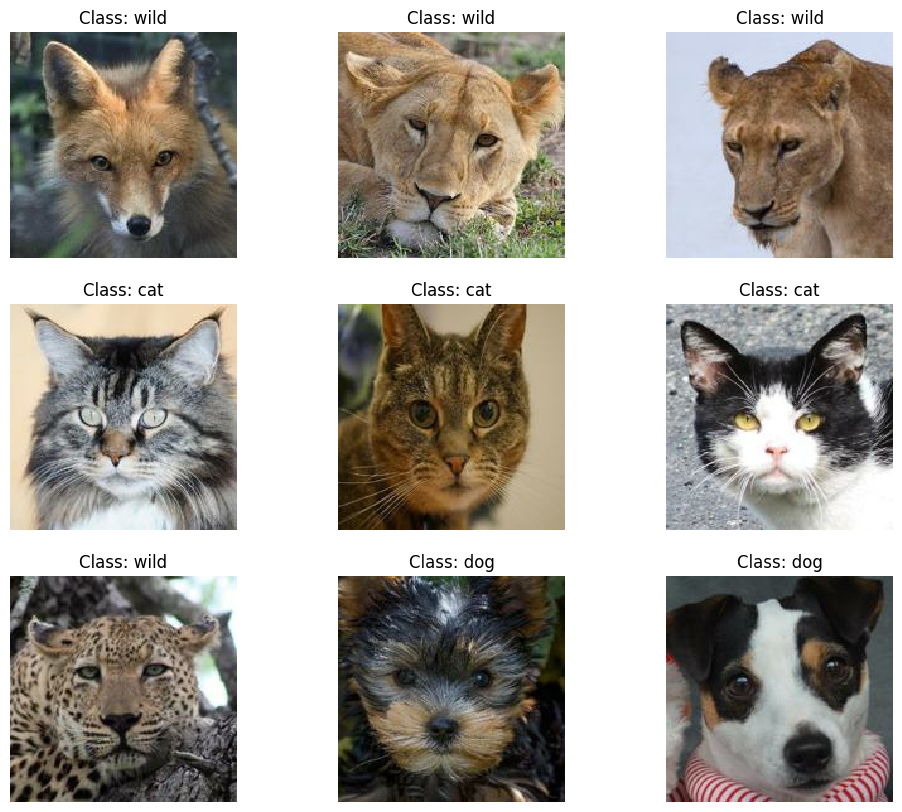

In [45]:
class_names = ["cat", "dog", "wild"]

plt.figure(figsize=(12, 10))
index = 0
for element in train_dataset.take(1):
  for i in range(9):
    image = element[0][i]
    label = element[1][i]
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image/255, interpolation="nearest")
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

## DESARROLLO DEL MODELO

Para el desarrollo de este modelo se utilizó una arquitectura de red neuronal convolucional para hacer la clasificación de las 3 clases anteriormente mencionadas. Se compone inicialmente de una capa de entrada seguida de tres bloques de convolución con activación relu, max-pooling y batch normalization. Después se busca aplanar la imagen usando GlobalAveragePooling seguido de un flatten para posteriormente pasar por dos capas densas, una de 256 y otra de 512 unidades que contienen un dropout y normalización. Parafinalizar pasa por una capa densa con activación softmax.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model1(input_shape=(180, 180, 3), num_classes=3):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(62, (3, 3), activation="relu", padding="same")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)

    x = layers.Dense(512, activation="relu")(x)
    x = layers.Dropout(0.6)(x) 
    x = layers.BatchNormalization()(x)

    x = layers.Dense(256, activation="relu")(x)
    x = layers.Dropout(0.4)(x)
    x = layers.BatchNormalization()(x)

    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

Aquí se construye el modelo y se está usando las características por default del optimizador adam y se usa un loss de sparse_categorical_crossentropy.

In [48]:
model = build_model1()
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
import os

save_dir = "./models" 
os.makedirs(save_dir, exist_ok=True)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_dir, "improved_model.h5"), save_best_only=True, monitor="val_loss")
]

In [50]:
history1 = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/10
458/458 [==============================] - 344s 749ms/step - loss: 1.0885 - accuracy: 0.4919 - val_loss: 4.7800 - val_accuracy: 0.3827
Epoch 2/10


/Users/davidmaza/Desktop/Blumenkron/.conda/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


458/458 [==============================] - 333s 726ms/step - loss: 0.6566 - accuracy: 0.7178 - val_loss: 2.4264 - val_accuracy: 0.3833
Epoch 3/10
458/458 [==============================] - 329s 718ms/step - loss: 0.4348 - accuracy: 0.8369 - val_loss: 0.9896 - val_accuracy: 0.6567
Epoch 4/10
458/458 [==============================] - 328s 716ms/step - loss: 0.3543 - accuracy: 0.8656 - val_loss: 0.3547 - val_accuracy: 0.8647
Epoch 5/10
458/458 [==============================] - 330s 721ms/step - loss: 0.2870 - accuracy: 0.8951 - val_loss: 1.0038 - val_accuracy: 0.6807
Epoch 6/10
458/458 [==============================] - 329s 718ms/step - loss: 0.2581 - accuracy: 0.9064 - val_loss: 0.4369 - val_accuracy: 0.8267
Epoch 7/10
458/458 [==============================] - 331s 724ms/step - loss: 0.2155 - accuracy: 0.9231 - val_loss: 0.3522 - val_accuracy: 0.8727
Epoch 8/10
458/458 [==============================] - 333s 727ms/step - loss: 0.1859 - accuracy: 0.9344 - val_loss: 0.4091 - val_accura

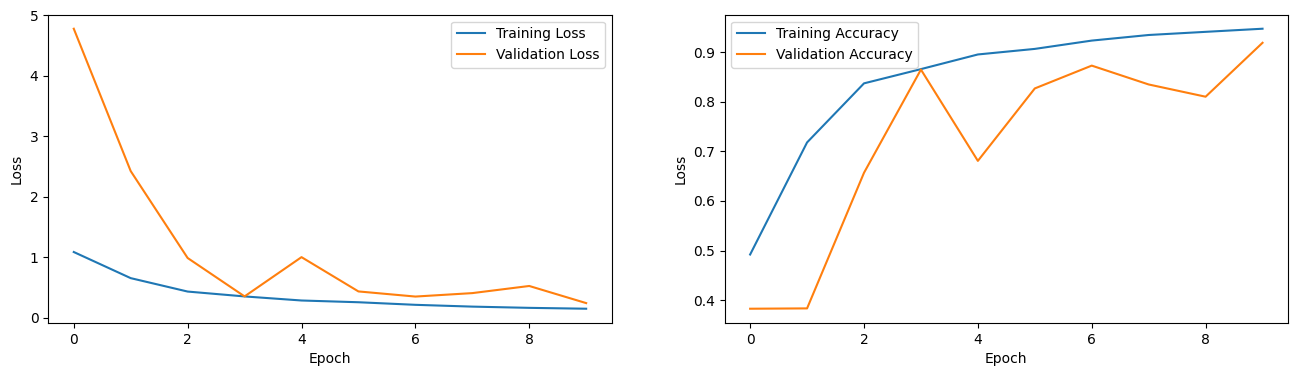

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Al correr el entrenamiento del modelo se puede observar tanto en las métricas como en las gráficas que el modelo cumplió un buen entrenamiento aumentando su accuracy en cada una de las épocas. Por otro lado se pude observar que el val_accuracy también hizo un buen desempeño teniendo valores muy acertados como 0.9187, sin embargo en la gráfica del modelo se puede observar que es bastante irregular los valores del val_accuracy, aunque si bien no tiene mal desempeño en métricas, si vemos que tiene unos picos bastante extraños.

## AJUSTE DEL MODELO

Para el ajuste del modelo en comparación del modelo anterior, se eliminó una capa densa intermedia junto con su dropout. Tambiés se eliminó la capa de GlobalAveragePooling, dejando solo el flatten para aplanar la salida de las convoluciones. Por último se ajustó el dropout en la capa densa de 512 unidades, ajustándolo a 0.5.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model(input_shape=(180, 180, 3), num_classes=3):
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(62, (3, 3), activation="relu", padding="same")(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2D(256, (3, 3), activation="relu", padding="same")(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)

    x = layers.Dense(512, activation="relu")(x)
    x = layers.Dropout(0.5)(x) 
    x = layers.BatchNormalization()(x)


    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs, outputs)
    return model

In [47]:
model = build_model()
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
import os

save_dir = "./models"
os.makedirs(save_dir, exist_ok=True)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_dir, "improved_model.h5"), save_best_only=True, monitor="val_loss")
]

In [49]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/10
458/458 [==============================] - ETA: 0s - loss: 0.3708 - accuracy: 0.8518

/Users/davidmaza/Desktop/Blumenkron/.conda/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


458/458 [==============================] - 392s 853ms/step - loss: 0.3708 - accuracy: 0.8518 - val_loss: 0.3546 - val_accuracy: 0.8507
Epoch 2/10
458/458 [==============================] - 393s 858ms/step - loss: 0.1555 - accuracy: 0.9460 - val_loss: 0.6671 - val_accuracy: 0.8107
Epoch 3/10
458/458 [==============================] - 389s 849ms/step - loss: 0.1074 - accuracy: 0.9617 - val_loss: 0.2716 - val_accuracy: 0.9260
Epoch 4/10
458/458 [==============================] - 385s 840ms/step - loss: 0.1128 - accuracy: 0.9590 - val_loss: 0.1816 - val_accuracy: 0.9333
Epoch 5/10
458/458 [==============================] - 379s 828ms/step - loss: 0.0899 - accuracy: 0.9686 - val_loss: 0.1150 - val_accuracy: 0.9640
Epoch 6/10
458/458 [==============================] - 368s 804ms/step - loss: 0.0748 - accuracy: 0.9716 - val_loss: 0.0855 - val_accuracy: 0.9693
Epoch 7/10
458/458 [==============================] - 366s 799ms/step - loss: 0.0541 - accuracy: 0.9805 - val_loss: 0.0829 - val_accura

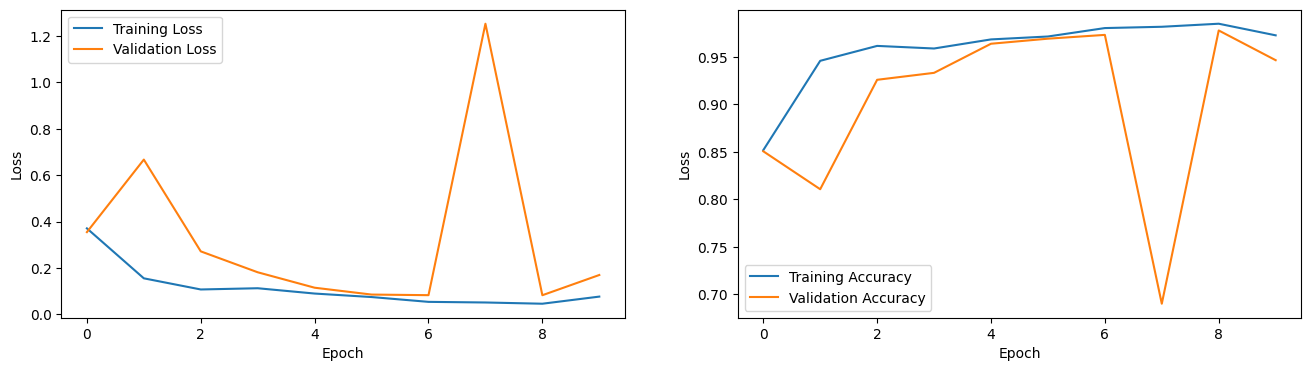

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Después de completar el entrenamiento del modelo ajustado, podemos observar que tanto en las métricas como en las gráficas, se nota una mejoría en el desempeño de ambos conjuntos. Por su parte en la parte de las métricas el obtener un valor máximo de val_accuracy de 0.9780 podemos entender que el desempeño del modelo es bueno. Por otro lado en las gráficas aunque podemos ver un pico muy grande en el conjunto de validación, podemos ver que los picos se regularizaron bastantes y tiene un accuracy más constante en cada una de las épocas.

In [51]:
model.save("modelEv.h5")

## RESULTADOS

In [9]:
print("Directorio actual:", os.getcwd())

Directorio actual: /Users/davidmaza/Desktop/Blumenkron


In [29]:
import os, shutil, pathlib
from keras.utils import image_dataset_from_directory

base_dir = pathlib.Path("animal-faces/afhq")

test_dataset = image_dataset_from_directory(
    base_dir / "test-data",
    image_size=(180, 180),
    batch_size=32)



Found 60 files belonging to 1 classes.


In [52]:
from tensorflow.keras.models import load_model


prueba = load_model("/Users/davidmaza/Desktop/Blumenkron/modelEv.h5")

In [56]:
test_loss, test_acc = prueba.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 [==============================] - 1s 257ms/step - loss: 6.7249 - accuracy: 0.3000
Test accuracy: 0.300


Un aspecto importante a mencionar, es que el dataset utilizado no contenía un dataset "test" para hacer las pruebas correspondientes, sin embargo, al yo conocer los diferenciadores de cada clase, me di la oportunidad de generar un dataset de prueba bastante chico para atenderme a las indicaciones del modelo. El dataset de prueba es de una complejidad extrema para el modelo ya que si bien, si cuenta con imagenes de los animales propuestos por el dataset, también se incluyeron imágenes de animales con accesorios u otros animales de la vida salvaje para poder ofrecer un reto extremo al modelo, sé que no es la mejor práctica, pero al no contar con un conjunto de datos de prueba, fue una alternativa para completar la asignación.

## CONCLUSIONES

Al ver los resultados de los entrenamientos de los modelos implementados, pude concluir de manera general que el modelo funciona bien gracias a la arquitectura implementada. Sin embargo es importante mencionar que en primera instancia al intentar hacer la implementación con una arquitectura y un dataset diferente se me hizo demasiado complicado, ya que el intentar data argumentation y una combinación de arquitectura diferente, estaba obteniendo un overfitting que impedía hacer predicciones correctas al modelo. Gracias a esto me di la oportunidad de cambiar a una estructura de bloques convolucionales y capas densas pude obtener mejores resultados.

Considero importante mencionar es que al ser una implementación de deep learning uno pensaría que mientras más capas y más normalizaciones tenga una arquitectura, esta proporcionaría un mejor desempeño, sin embargo, esta implementación hizo notar que no siempre es así, ya que el estar probando y hacer un modelo más simple puede generar que el modelo no obtenga un overfitting y no pierda datos en el entrenamiento, por lo que se puede entender que hay que analizar muy bien la promlemática a resolver y entender muy bien el conjunto de datos que se va a utilizar para el modelo.

Considero que una manera en la cual se pudiera mejorar el desempeño del modelo para futuras implementaciones, sería considerar más hiperparámetros y no utilizar los valores default del optimizador, es decir, creo que considerar valores como el learning rate y el batch size, pudieran ayudar a mejorar el entendimiento y el aprendizaje del modelo.

## APLICACIÓN

1/1 [==============================] - 0s 272ms/step


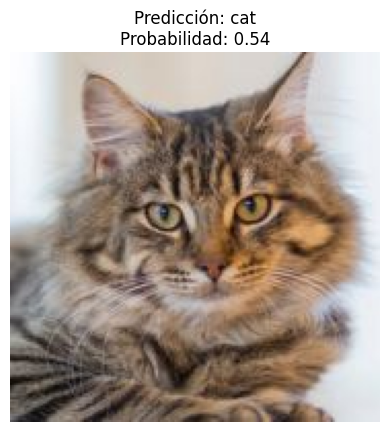

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

class_names = ["cat", "dog", "wild"]

def predict_image_class(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0) 

    predictions = model.predict(img_batch)
    predicted_class = np.argmax(predictions[0]) 
    predicted_class_name = class_names[predicted_class]
    
    plt.imshow(img)
    plt.title(f"Predicción: {predicted_class_name}\nProbabilidad: {predictions[0][predicted_class]:.2f}")
    plt.axis("off")
    plt.show()
    
    return predicted_class_name

img_path = "/Users/davidmaza/Desktop/Blumenkron/gato-prueba.jpg" 
predicted_class = predict_image_class(prueba, img_path, class_names)


1/1 [==============================] - 0s 67ms/step


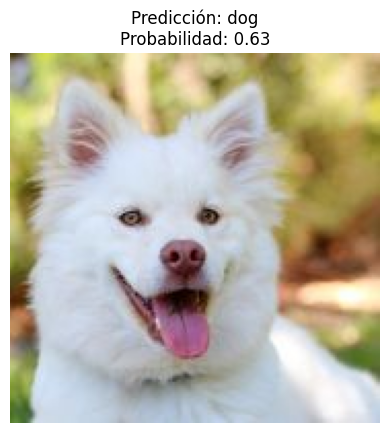

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

class_names = ["cat", "dog", "wild"]

def predict_image_class(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_batch)
    predicted_class = np.argmax(predictions[0]) 
    predicted_class_name = class_names[predicted_class]
    
    plt.imshow(img)
    plt.title(f"Predicción: {predicted_class_name}\nProbabilidad: {predictions[0][predicted_class]:.2f}")
    plt.axis("off")
    plt.show()
    
    return predicted_class_name

img_path = "/Users/davidmaza/Desktop/Blumenkron/perro-prueba.jpg" 
predicted_class = predict_image_class(prueba, img_path, class_names)

1/1 [==============================] - 0s 117ms/step


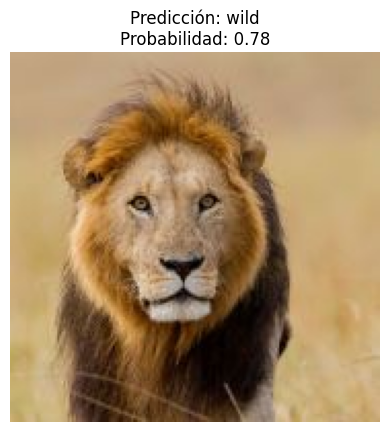

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

class_names = ["cat", "dog", "wild"]

def predict_image_class(model, img_path, class_names):
    img = image.load_img(img_path, target_size=(180, 180))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0) 

    predictions = model.predict(img_batch)
    predicted_class = np.argmax(predictions[0]) 
    predicted_class_name = class_names[predicted_class]
    
    plt.imshow(img)
    plt.title(f"Predicción: {predicted_class_name}\nProbabilidad: {predictions[0][predicted_class]:.2f}")
    plt.axis("off")
    plt.show()
    
    return predicted_class_name

img_path = "/Users/davidmaza/Desktop/Blumenkron/wild-prueba.jpg"  # Cambia a la ruta de tu imagen
predicted_class = predict_image_class(prueba, img_path, class_names)

Para la aplicación para la predicción del modelo, podemos observar que el modelo si predice correctamente al nosotros proporcionarle una imagen diferente a las que tiene en sus conjuntos de entrenamiento y validación, aún así se le entregaran más imágenes, el modelo puede seguir acertando.